# Feature Extraction (Özellik Çıkarımı)

In [1]:
# Özellik çıkarımı ham veriden değişken türetmek demektir.
# Ham veriden değişken türetmek iki kapsamda değerlendirilebilir.

# 1. Yapısal verilerden değişken türetmek
# 2. Yapısal olmayan verilerden değişken türetmek

        Yapısal veriden değişken türetmek demek, hali hazırda elimizde belirli bir formatta olan değişkenlerden türetilen verilerdir.

        Ses, görüntü, yazı gibi yapısal olmayan verilerden de değişken üretilebilir.

<p align="center" >    
    <img src = "grafikler/feature_extraction.png" width= "600" />
</p>

Yukarıdaki gibi tek bir tarih serisinden üretilen değişkenler, Özellik Çıkarımına örnektir.

In [2]:
# Kütüphanelerimizi import edelim;

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
def load_application_train():
    data = pd.read_csv("datasets/application_train.csv")
    return data

def load():
    data = pd.read_csv("datasets/titanic.csv")
    return data

## Binary Features: Flag, Bool, True-False

In [5]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [6]:
# Yukarıdaki titanic verisinde bulunan cabin değişkenini "NaN" değeri 0 dolu değeri 1 olacak şekilde yeni bir özellik çıkarmak istersek;

df["NEW_CABIN_BOOL"] = df["Cabin"].notnull()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_CABIN_BOOL
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,False


In [7]:
# Yeni değişkendeki "True" ve "False" değerleri integerlara dönüştürelim;

df["NEW_CABIN_BOOL"] = df["Cabin"].notnull().astype('int')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_CABIN_BOOL
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0


In [8]:
df.groupby("NEW_CABIN_BOOL").agg({"Survived": ["count", "mean"]})

# Aşağıda görülmektedir ki, kabin bilgisi olan kişilerin hayatta kalma oranları, kabin bilgisi olmayan kişilere kıyasla 2 kattır.

Survived      
                  count  mean
NEW_CABIN_BOOL               
0                   687 0.300
1                   204 0.667

In [9]:
# Yukarıdaki durumu two sample proportion z-test ile bir test edelim;
# Daha da detay bilgi için "https://www.statology.org/two-proportion-z-test/" internet sitesine bakılabilir;

from statsmodels.stats.proportion import proportions_ztest

test_stat, pvalue = proportions_ztest(count=[df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].sum(),
                                             df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].sum()],

                                      nobs=[df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].shape[0],
                                            df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].shape[0]])

# two sample proportion z-test için başarı sayısı ve gözlem sayısı istatistiklerine ihtiyaç vardır;
# count = başarı sayısıdır.
# nobs = gözlem sayısıdır.

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 9.4597, p-value = 0.0000


        Two Sample Proportion z-test de H0 hipotezi "Gruplar arasında oranlar açısından istatistiksel olarak anlamlı fark yoktur" derken, alternatif hipotez olarak H1 ise "En az iki grup arasında oranlar açısından istatistiksel olarak anlamlı fark vardır" der.

        Yukarıda p-value 0.05'ten küçük olduğu için H0 hipotezi reddedilir.

In [10]:
# Yeni bir binary feature oluşturalım;

# Kişilerin gemide yalnız seyahat edip etmediklerine bakalım;

df.loc[((df['SibSp'] + df['Parch']) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df['SibSp'] + df['Parch']) == 0), "NEW_IS_ALONE"] = "YES"
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_CABIN_BOOL,NEW_IS_ALONE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,NO
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,NO
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,YES
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,NO
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,YES


In [11]:
df.groupby("NEW_IS_ALONE").agg({"Survived": ["count", "mean"]})

# aşağıdaki tabloya bakıldığında, yalnız olan kişilerin kurtulma olasılıklarının daha az olduğunu görüyoruz.

Survived      
                count  mean
NEW_IS_ALONE               
NO                354 0.506
YES               537 0.304

## Text'ler Üzerinden Özellik Türetmek

In [12]:
# verimizi resetleyelim;

df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [13]:
# Bu kısımda metinlerimizden bir özellik üretmeye çalışacağız;

# Veri setimizdeki "Name" değişkeni normalde tek başına kardinalitesi yüksek olan bir değişkendi, 
# bakalım buradan nasıl bir özellik çıkarabiliriz.

In [14]:
###################
# Letter Count
###################

df["NEW_NAME_COUNT"] = df["Name"].str.len()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,24


In [15]:
###################
# Word Count
###################

df["NEW_NAME_WORD_COUNT"] = df["Name"].apply(lambda x: len(str(x).split(" ")))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,23,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,51,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,22,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,44,7
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,24,4


In [16]:
###################
# Özel Yapıları Yakalamak
###################

df["NEW_NAME_DR"] = df["Name"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,23,4,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,51,7,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,22,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,44,7,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,24,4,0


In [17]:
df.groupby("NEW_NAME_DR").agg({"Survived": ["mean","count"]})

Survived      
                mean count
NEW_NAME_DR               
0              0.383   881
1              0.500    10

## Regex ile Değişken Türetmek

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,23,4,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,51,7,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,22,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,44,7,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,24,4,0


In [19]:
# Yukarıdaki titanic verisinin "Name" değişkeni içerisindeki title'ları yakalamaya çalışıyoruz;
# Bunun için ise Regex kullanacağız. (Regular Expression)

# Yani benzer ifadeleri bulacağız;
# Şimdi yukarıdaki title'lara bakıldığında şu açıdan benzerdir;

# "Braund, Mr. Owen Harris" örneği inceleyelim;
# "Mr" ifadesinden önce boşluk var, ifade sonrası ise "." var.
# Ayrıca büyük harf ve küçük harf içeriyor.

df['NEW_TITLE'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# extract demek çıkarma demektir.

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,23,4,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,51,7,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,22,3,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,44,7,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,24,4,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,NaN,S,21,3,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.000,B42,S,28,4,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S,40,5,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C148,C,21,4,0,Mr


In [20]:
df[["NEW_TITLE", "Survived", "Age"]].groupby(["NEW_TITLE"]).agg({"Survived": "mean", "Age": ["count", "mean"]})

# Artık eksik olan yaş değişkenlerine daha iyi bir atama yapılabilir örnek olarak...

# Miss ile Mrs arasında yaş farkı vardır zira.

Survived   Age       
              mean count   mean
NEW_TITLE                      
Capt         0.000     1 70.000
Col          0.500     2 58.000
Countess     1.000     1 33.000
Don          0.000     1 40.000
Dr           0.429     6 42.000
Jonkheer     0.000     1 38.000
Lady         1.000     1 48.000
Major        0.500     2 48.500
Master       0.575    36  4.574
Miss         0.698   146 21.774
Mlle         1.000     2 24.000
Mme          1.000     1 24.000
Mr           0.157   398 32.368
Mrs          0.792   108 35.898
Ms           1.000     1 28.000
Rev          0.000     6 43.167
Sir          1.000     1 49.000

## Date Değişkenleri Üretmek

In [21]:
dff = pd.read_csv("datasets/course_reviews.csv")
dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000


In [22]:
dff.info()

# Aşağıda görülmektedir ki, zaman değişkeni olması gereken "Timestamp" ve "Enrolled" değişkenleri objecttir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              4323 non-null   float64
 1   Timestamp           4323 non-null   object 
 2   Enrolled            4323 non-null   object 
 3   Progress            4323 non-null   float64
 4   Questions Asked     4323 non-null   float64
 5   Questions Answered  4323 non-null   float64
dtypes: float64(4), object(2)
memory usage: 202.8+ KB


In [23]:
dff['Timestamp'] = pd.to_datetime(dff["Timestamp"], format="%Y-%m-%d")

In [24]:
# Kontrol edelim;

dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rating              4323 non-null   float64       
 1   Timestamp           4323 non-null   datetime64[ns]
 2   Enrolled            4323 non-null   object        
 3   Progress            4323 non-null   float64       
 4   Questions Asked     4323 non-null   float64       
 5   Questions Answered  4323 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 202.8+ KB


In [25]:
# year
dff['year'] = dff['Timestamp'].dt.year
dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered,year
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000,2021
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000,2021
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000,2021
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000,2021
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000,2021


In [26]:
# month
dff['month'] = dff['Timestamp'].dt.month
dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered,year,month
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000,2021,2
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000,2021,2
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000,2021,2
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000,2021,2
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000,2021,2


In [27]:
# year diff
dff['year_diff'] = date.today().year - dff['Timestamp'].dt.year
dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered,year,month,year_diff
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000,2021,2,2
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000,2021,2,2
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000,2021,2,2
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000,2021,2,2
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000,2021,2,2


In [28]:
# month diff (iki tarih arasındaki ay farkı): yıl farkı + ay farkı
dff['month_diff'] = (date.today().year - dff['Timestamp'].dt.year) * 12 + date.today().month - dff['Timestamp'].dt.month
dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered,year,month,year_diff,month_diff
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000,2021,2,2,24
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000,2021,2,2,24
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000,2021,2,2,24
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000,2021,2,2,24
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000,2021,2,2,24


In [29]:
# day name
dff['day_name'] = dff['Timestamp'].dt.day_name()
dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered,year,month,year_diff,month_diff,day_name
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000,2021,2,2,24,Friday
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000,2021,2,2,24,Thursday
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000,2021,2,2,24,Thursday
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000,2021,2,2,24,Thursday
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000,2021,2,2,24,Thursday


## Feature Interactions (Özellik Etkileşimleri)

In [30]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [31]:
df["NEW_FAMILY_SIZE"] = df["SibSp"] + df["Parch"] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_FAMILY_SIZE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,1


In [32]:
df.loc[(df['Sex'] == 'male') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_FAMILY_SIZE,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,2,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,2,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,1,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,2,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,1,NaN


In [33]:
df.loc[(df['Sex'] == 'male') & (df['Age'] > 21) & (df['Age'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['Sex'] == 'male') & (df['Age'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['Sex'] == 'female') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['Sex'] == 'female') & (df['Age'] > 21) & (df['Age'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['Sex'] == 'female') & (df['Age'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_FAMILY_SIZE,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,2,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,2,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,1,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,2,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,1,maturemale


In [35]:
df.groupby("NEW_SEX_CAT")["Survived"].mean()

NEW_SEX_CAT
maturefemale   0.774
maturemale     0.199
seniorfemale   0.909
seniormale     0.135
youngfemale    0.679
youngmale      0.250
Name: Survived, dtype: float64

## Uygulama

        Bu bölümde titanic veri setini gördüğümüz bütün konuları kapsayacak şekilde uçtan uca ele alıyor olacağız.

In [36]:
# Veri setine bir reset atalım;

df = load()

# Veri setimizi hatırlayalım;

df.shape

(891, 12)

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [38]:
# Değişken isimlerini büyük harf yapalım;

df.columns = [col.upper() for col in df.columns]

In [39]:
df.head(2)

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C


In [40]:
#############################################
# 1. Feature Engineering (Değişken Mühendisliği)
#############################################

In [41]:
# Cabin bool
df["NEW_CABIN_BOOL"] = df["CABIN"].notnull().astype('int')
# Name count
df["NEW_NAME_COUNT"] = df["NAME"].str.len()
# name word count
df["NEW_NAME_WORD_COUNT"] = df["NAME"].apply(lambda x: len(str(x).split(" ")))
# name dr
df["NEW_NAME_DR"] = df["NAME"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))
# name title
df['NEW_TITLE'] = df.NAME.str.extract(' ([A-Za-z]+)\.', expand=False)
# family size
df["NEW_FAMILY_SIZE"] = df["SIBSP"] + df["PARCH"] + 1
# age_pclass
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]
# is alone
df.loc[((df['SIBSP'] + df['PARCH']) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df['SIBSP'] + df['PARCH']) == 0), "NEW_IS_ALONE"] = "YES"
# age level
df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'
# sex x age
df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,...,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,...,0,23,4,0,Mr,2,66.000,NO,mature,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,...,1,51,7,0,Mrs,2,38.000,NO,mature,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,...,0,22,3,0,Miss,1,78.000,YES,mature,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,...,1,44,7,0,Mrs,2,35.000,NO,mature,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,...,0,24,4,0,Mr,1,105.000,YES,mature,maturemale


In [42]:
df.shape

# Değişken sayımız 12'den 22'ye çıktı

(891, 22)

In [43]:
# Önceden yazmış olduğumuz fonksiyonları tanımlayalım;

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


In [44]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

# değişkenlerimi sınıflandırıyorum.

Observations: 891
Variables: 22
cat_cols: 14
num_cols: 5
cat_but_car: 3
num_but_cat: 8


In [45]:
print("cat cols =", cat_cols)
print("num cols =",num_cols)
print("cat but car cols =",cat_but_car)

cat cols = ['SEX', 'EMBARKED', 'NEW_TITLE', 'NEW_IS_ALONE', 'NEW_AGE_CAT', 'NEW_SEX_CAT', 'SURVIVED', 'PCLASS', 'SIBSP', 'PARCH', 'NEW_CABIN_BOOL', 'NEW_NAME_WORD_COUNT', 'NEW_NAME_DR', 'NEW_FAMILY_SIZE']
num cols = ['PASSENGERID', 'AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']
cat but car cols = ['NAME', 'TICKET', 'CABIN']


In [46]:
# numerik değişkenler için de "PASSENGERID" istemiyorduk.

num_cols = [col for col in num_cols if "PASSENGERID" not in col]

In [47]:
#############################################
# 2. Outliers (Aykırı Değerler)
#############################################

In [48]:
# Önceki kısımlardan bir fonksiyon daha çağıralım;

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [49]:
for col in num_cols:
    print(col, check_outlier(df, col))

AGE True
FARE True
NEW_NAME_COUNT True
NEW_AGE_PCLASS True


In [50]:
# Önceki çalışmalardan bir fonksiyon daha çağırıyoruz;

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [51]:
# Yukarıdaki aykırı değerlerimizi baskılayalım;

for col in num_cols:
    replace_with_thresholds(df, col)

In [52]:
# Aykırı değer kalmış mı kontrol edelim;

for col in num_cols:
    print(col, check_outlier(df, col))

AGE False
FARE False
NEW_NAME_COUNT False
NEW_AGE_PCLASS False


In [53]:
#############################################
# 3. Missing Values (Eksik Değerler)
#############################################

In [54]:
# missing value notebook'undan bir fonksiyon çağıralım;

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [55]:
missing_values_table(df)

# kabin değişkeni için yeni bir değişken oluşturduk bu sebeple veri setimizden drop edebiliriz.
# Yaş değişkenindeki eksik değerlerden dolayı diğer veriler de eksik değer barındırıyor.

                n_miss  ratio
CABIN              687 77.100
AGE                177 19.870
NEW_AGE_PCLASS     177 19.870
NEW_AGE_CAT        177 19.870
NEW_SEX_CAT        177 19.870
EMBARKED             2  0.220


In [56]:
# cabin setini veri setinden drop edelim;

df.drop("CABIN", inplace=True, axis=1)

In [57]:
# Veri setindeki istemediğimiz diğer değişkenleri de drop edelim;

remove_cols = ["TICKET", "NAME"]
df.drop(remove_cols, inplace=True, axis=1)

In [58]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,SEX,AGE,SIBSP,PARCH,FARE,EMBARKED,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,male,22.000,1,0,7.250,S,0,23,4,0,Mr,2,66.000,NO,mature,maturemale
1,2,1,1,female,38.000,1,0,65.634,C,1,45,7,0,Mrs,2,38.000,NO,mature,maturefemale
2,3,1,3,female,26.000,0,0,7.925,S,0,22,3,0,Miss,1,78.000,YES,mature,maturefemale
3,4,1,1,female,35.000,1,0,53.100,S,1,44,7,0,Mrs,2,35.000,NO,mature,maturefemale
4,5,0,3,male,35.000,0,0,8.050,S,0,24,4,0,Mr,1,105.000,YES,mature,maturemale


In [59]:
df["AGE"] = df["AGE"].fillna(df.groupby("NEW_TITLE")["AGE"].transform("median"))

# "AGE" değişkenindeki eksik değerleri "NEW_TITLE"la göre "groupby"a alıyoruz ve bu verilerin medyanına göre dolduruyoruz.

In [60]:
df.isnull().sum()

PASSENGERID              0
SURVIVED                 0
PCLASS                   0
SEX                      0
AGE                      0
SIBSP                    0
PARCH                    0
FARE                     0
EMBARKED                 2
NEW_CABIN_BOOL           0
NEW_NAME_COUNT           0
NEW_NAME_WORD_COUNT      0
NEW_NAME_DR              0
NEW_TITLE                0
NEW_FAMILY_SIZE          0
NEW_AGE_PCLASS         177
NEW_IS_ALONE             0
NEW_AGE_CAT            177
NEW_SEX_CAT            177
dtype: int64

In [61]:
# Bu yaş değişkeni üzerinden oluşturulan diğer değişkenleri yeniden oluşturmamız lazım;
# Burada görüyoruz ki feature engineering ile veri ön işleme birbirinden çok etkilenen süreçlerdir.

df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'

df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

In [62]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,SEX,AGE,SIBSP,PARCH,FARE,EMBARKED,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,male,22.000,1,0,7.250,S,0,23,4,0,Mr,2,66.000,NO,mature,maturemale
1,2,1,1,female,38.000,1,0,65.634,C,1,45,7,0,Mrs,2,38.000,NO,mature,maturefemale
2,3,1,3,female,26.000,0,0,7.925,S,0,22,3,0,Miss,1,78.000,YES,mature,maturefemale
3,4,1,1,female,35.000,1,0,53.100,S,1,44,7,0,Mrs,2,35.000,NO,mature,maturefemale
4,5,0,3,male,35.000,0,0,8.050,S,0,24,4,0,Mr,1,105.000,YES,mature,maturemale


In [63]:
# Kontrolümüzü edelim;

missing_values_table(df)

# Sadece embarked kaldı.

          n_miss  ratio
EMBARKED       2  0.220


In [64]:
# Embarked'ı da sistematik bir şekilde halledelim;

df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

In [65]:
missing_values_table(df)

# Eksik değerleri de halettik.

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [66]:
#############################################
# 4. Label Encoding
#############################################

In [67]:
# iki sınıflı kategorik değişkenleri bir seçelim;

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

binary_cols

['SEX', 'NEW_IS_ALONE']

In [68]:
df['NEW_IS_ALONE']

0       NO
1       NO
2      YES
3       NO
4      YES
      ... 
886    YES
887    YES
888     NO
889    YES
890    YES
Name: NEW_IS_ALONE, Length: 891, dtype: object

In [69]:
# Önceki çalışamlarımızdan bir fonksiyon çağıralım;

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [70]:
for col in binary_cols:
    df = label_encoder(df, col)

        Label encoding'ten sonra aklımıza one hot encoding gelmeli, lakin arada rare encoding yaptıktan sonra one hot encoding yapmalıyız.

In [71]:
#############################################
# 5. Rare Encoding
#############################################

In [72]:
# Önceki bölümlerden fonksiyonlarımızı çağıralım;

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


def rare_encoder(dataframe, rare_perc):

    # Üzerinde değişiklik yapılacağından dolayı dataframe'mimizin bir kopyasını alalım.
    temp_df = dataframe.copy()

    # rare_columns listesi tanımlayalım ve yakalayacağımız rare değişkenleri bu listede tutalım.
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'    # değişkenin tipi object (kategorik) ise ve ...
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
                    # ... veri içerisinde görülme sıklığı belirlenen "rare_perc" oranından küçük grup barındıran değişkenlerin seçilme işlemi
                    # Yukarıda ".any()" metodu da bulunmaktadır, içinde var ise listeye almasını söylüyoruz.


    for var in rare_columns:    # içerisinde görülme sıklığı %1'in altıda grup barındıran rare column'larda gez,
        tmp = temp_df[var].value_counts() / len(temp_df) # Bu değişken/sütunlar içerisindeki grupların yüzdelerini hesapla,
        rare_labels = tmp[tmp < rare_perc].index    # Bu hesaplanan yüzdeler "rare_perc"ten küçük ise bunların indeksini al,
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var]) # indeksi alınan yerdeki değişkene rare yaz diyoruz.

    return temp_df

In [73]:
rare_analyser(df, "SURVIVED", cat_cols)

SEX : 2
   COUNT  RATIO  TARGET_MEAN
0    314  0.352        0.742
1    577  0.648        0.189


EMBARKED : 3
   COUNT  RATIO  TARGET_MEAN
C    168  0.189        0.554
Q     77  0.086        0.390
S    646  0.725        0.339


NEW_TITLE : 17
          COUNT  RATIO  TARGET_MEAN
Capt          1  0.001        0.000
Col           2  0.002        0.500
Countess      1  0.001        1.000
Don           1  0.001        0.000
Dr            7  0.008        0.429
Jonkheer      1  0.001        0.000
Lady          1  0.001        1.000
Major         2  0.002        0.500
Master       40  0.045        0.575
Miss        182  0.204        0.698
Mlle          2  0.002        1.000
Mme           1  0.001        1.000
Mr          517  0.580        0.157
Mrs         125  0.140        0.792
Ms            1  0.001        1.000
Rev           6  0.007        0.000
Sir           1  0.001        1.000


NEW_IS_ALONE : 2
   COUNT  RATIO  TARGET_MEAN
0    354  0.397        0.506
1    537  0.603        0.304


N

In [74]:
df = rare_encoder(df, 0.01)

In [75]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,SEX,AGE,SIBSP,PARCH,FARE,EMBARKED,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,1,22.000,1,0,7.250,S,0,23,4,0,Mr,2,66.000,0,mature,maturemale
1,2,1,1,0,38.000,1,0,65.634,C,1,45,7,0,Mrs,2,38.000,0,mature,maturefemale
2,3,1,3,0,26.000,0,0,7.925,S,0,22,3,0,Miss,1,78.000,1,mature,maturefemale
3,4,1,1,0,35.000,1,0,53.100,S,1,44,7,0,Mrs,2,35.000,0,mature,maturefemale
4,5,0,3,1,35.000,0,0,8.050,S,0,24,4,0,Mr,1,105.000,1,mature,maturemale


In [76]:
df["NEW_TITLE"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: NEW_TITLE, dtype: int64

In [77]:
#############################################
# 6. One-Hot Encoding
#############################################

In [78]:
# Bu kısımda one-hot encoding yapılacak olan değişkenleri yakalamamız gerekiyor;
# iki sınıfa sahip değişkenleri dönüştürmüştük;

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [79]:
# Önceki bölümlerden bir fonksiyon çağıralım;

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe 

In [80]:
df = one_hot_encoder(df, ohe_cols)

In [81]:
df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,...,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,22.000,7.250,0,23,0,66.000,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,0,38.000,65.634,1,45,0,38.000,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,26.000,7.925,0,22,0,78.000,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,35.000,53.100,1,44,0,35.000,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1,35.000,8.050,0,24,0,105.000,1,...,0,0,0,0,0,1,0,0,0,0


In [82]:
# Yeni veri setindeki değişken sayımıza bakalım;

df.shape

(891, 52)

    Veri setindeki değişken sayımızda doğal olarak artış gözlemledik. Tam bu aşamada geriye doğru gitmemiz gerekecek, dataframe'mimizi rare analyser ile bir kez daha analiz etmemiz gerekcek. Zira yeni oluşturduğumuz değişkenler bize bir şey ifade edecek ölçüde mi yoksa bize bir şey ifade etmeyecek frakansta mı bunu kontrol etmemiz gerekiyor.

In [83]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 52
cat_cols: 47
num_cols: 5
cat_but_car: 0
num_but_cat: 47


In [84]:
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

In [85]:
num_cols

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

In [86]:
rare_analyser(df, "SURVIVED", cat_cols)

SURVIVED : 2
   COUNT  RATIO  TARGET_MEAN
0    549  0.616        0.000
1    342  0.384        1.000


SEX : 2
   COUNT  RATIO  TARGET_MEAN
0    314  0.352        0.742
1    577  0.648        0.189


NEW_CABIN_BOOL : 2
   COUNT  RATIO  TARGET_MEAN
0    687  0.771        0.300
1    204  0.229        0.667


NEW_NAME_DR : 2
   COUNT  RATIO  TARGET_MEAN
0    881  0.989        0.383
1     10  0.011        0.500


NEW_IS_ALONE : 2
   COUNT  RATIO  TARGET_MEAN
0    354  0.397        0.506
1    537  0.603        0.304


PCLASS_2 : 2
   COUNT  RATIO  TARGET_MEAN
0    707  0.793        0.361
1    184  0.207        0.473


PCLASS_3 : 2
   COUNT  RATIO  TARGET_MEAN
0    400  0.449        0.557
1    491  0.551        0.242


SIBSP_1 : 2
   COUNT  RATIO  TARGET_MEAN
0    682  0.765        0.337
1    209  0.235        0.536


SIBSP_2 : 2
   COUNT  RATIO  TARGET_MEAN
0    863  0.969        0.381
1     28  0.031        0.464


SIBSP_3 : 2
   COUNT  RATIO  TARGET_MEAN
0    875  0.982        0.386
1     

In [87]:
rare_analyser(df, "SURVIVED", ["SIBSP_5"])

# Örnek olarak "SIBSP_5" ("Kardeş sayısı 5 mi, değil mi?") değişkenini ele alalım;
# %1'in çok çok çok altında olduğunu görüyoruz. Bu one hot encodin ile oluşturulan değişken bir bilgi taşımıyor gibi.
# Yani kardeş sayısı bu şekilde birden fazla değişken taşıyor ise kardeş sayısının olduğu gibi kalması gerektiğini düşünebiliriz.

SIBSP_5 : 2
   COUNT  RATIO  TARGET_MEAN
0    886  0.994        0.386
1      5  0.006        0.000




In [88]:
# Görülme frekansı yüzde birin altında olan değişkenleri yakalayalım;

useless_cols = [col for col in df.columns if df[col].nunique() == 2 and (df[col].value_counts() / len(df) < 0.01).any(axis=None)]
useless_cols

# Bu sütunları silmeyi tercih edebiliriz.

# df.drop(useless_cols, axis=1, inplace=True)
# Yukarıdaki kod parçasıyla silinilebilir.

['SIBSP_5',
 'SIBSP_8',
 'PARCH_3',
 'PARCH_4',
 'PARCH_5',
 'PARCH_6',
 'NEW_NAME_WORD_COUNT_9',
 'NEW_NAME_WORD_COUNT_14',
 'NEW_FAMILY_SIZE_8',
 'NEW_FAMILY_SIZE_11']

In [89]:
#############################################
# 7. Standart Scaler
#############################################

In [90]:
# İhtiyaç dahilinde standartlaştırma işlemi de gerçekleştirilebilir.

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

,AGE,FARE,NEW_NAME_COUNT,NEW_AGE_PCLASS
0,-0.561,-0.821,-0.437,0.066
1,0.663,2.032,2.248,-0.790
2,-0.255,-0.788,-0.559,0.434
3,0.434,1.419,2.126,-0.882
4,0.434,-0.781,-0.315,1.260


In [91]:
df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,...,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,-0.561,-0.821,0,-0.437,0,0.066,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,0,0.663,2.032,1,2.248,0,-0.790,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,-0.255,-0.788,0,-0.559,0,0.434,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0.434,1.419,1,2.126,0,-0.882,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1,0.434,-0.781,0,-0.315,0,1.260,1,...,0,0,0,0,0,1,0,0,0,0


In [92]:
df.shape

(891, 52)

    Artık herhangi bir makine öğrenmesi algoritması verimizin üzerinde çalışabilir bir haldedir.

In [93]:
#############################################
# 8. Model
#############################################

Bu modül kapsamında makine öğrenmesini daha görmedik, lakin madem verimiz hazır, biz de hazır veri kapsamında, detaylarda kaybolmadan bir makine öğrenmesi modeli geliştirelim istedik

In [94]:
# Bağımlı ve bağımsız değişkenlirimizi belirleyelim.

y = df["SURVIVED"]
X = df.drop(["PASSENGERID", "SURVIVED"], axis=1)

In [95]:
# Veri setimizi train ve test olarak ikiye ayıralım;
# Bunu modelimiz bütün veriyi görüp overfit yapmaması için yapıyoruz.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [96]:
# Bu kısımda da model nesnesini çağıracağız,

from sklearn.ensemble import RandomForestClassifier

In [97]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
# Yukarıdaki satırda modelimizi kurduk,
# Şunu hatırlatmakta fayda görüyorum, modeli kurmak ziyadesiyle kolay gibi gözükse de asıl uğraştırıcı kısım veri setimizi,
# modelin çalışabileceği formata getirebilmektir.

y_pred = rf_model.predict(X_test)
# Yukarıdaki kısımda modele göstermediğimiz bağımsız değişkenler ile modelin bağımlı değişkenini tahmin ettiriyoruz.

accuracy_score(y_pred, y_test)
# Yukarıda ise tahmin değerleri ile gerçek değerler arasındaki farkı ölçtürüyoruz.

0.8059701492537313

Yukarıda accuracy_score %80.5 çıkmıştır. Peki bu ne demektir? Bu modele göre, bu gemiye kişiler binmeden önce bilgilerini verseydi, bu bilgileri de bu modele sorsaydık, gemiye binenlerin yüzde %80.5'unun hayatta kalıp kalamayacağını doğru tahmin edebilirdik.

    Peki hiçbir değişiklik yapmasaydık, modelizimin tahmin değeri nasıl olurdu?

In [98]:
dff = load()
# verimizi çağırıyoruz.
dff.dropna(inplace=True)
# Eksik verileri verisetinden siliyoruz.
dff = pd.get_dummies(dff, columns=["Sex", "Embarked"], drop_first=True)
# Kategorik değişkenleri label encode ediyoruz. 2 sınıflı değişkenler de dahil. (Cinsiyet değişkeninden bahsediyoruz.)

y_1 = dff["Survived"]
# Bağımlı değişken tanımlanmıştır.
X_1 = dff.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
# Bağımsız değişkenler tanımlanmıştır.

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.30, random_state=17)
rf_model_1 = RandomForestClassifier(random_state=46).fit(X_train_1, y_train_1)
y_pred_1 = rf_model_1.predict(X_test_1)
accuracy_score(y_pred_1, y_test_1)

0.7090909090909091

Yukarıda görüldüğü üzere model accuracy'miz %10 azaldı.

    Bu süreçte şunu sorgulamamız gerekmektedir?
        Bizim yaptığımız bu işlemler bu %10'luk azalma için değer mi değmez mi?
        Yani aslında yaptığımız değişiklikler anlamlı mı anlamsız mı sorusunu araştırıyoruz.

In [99]:
# Burada bir fonksiyon tanımlayacağız, fonksiyon detaylarına şu aşamada takılmamamız gerektiğini hatırlatalım.

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

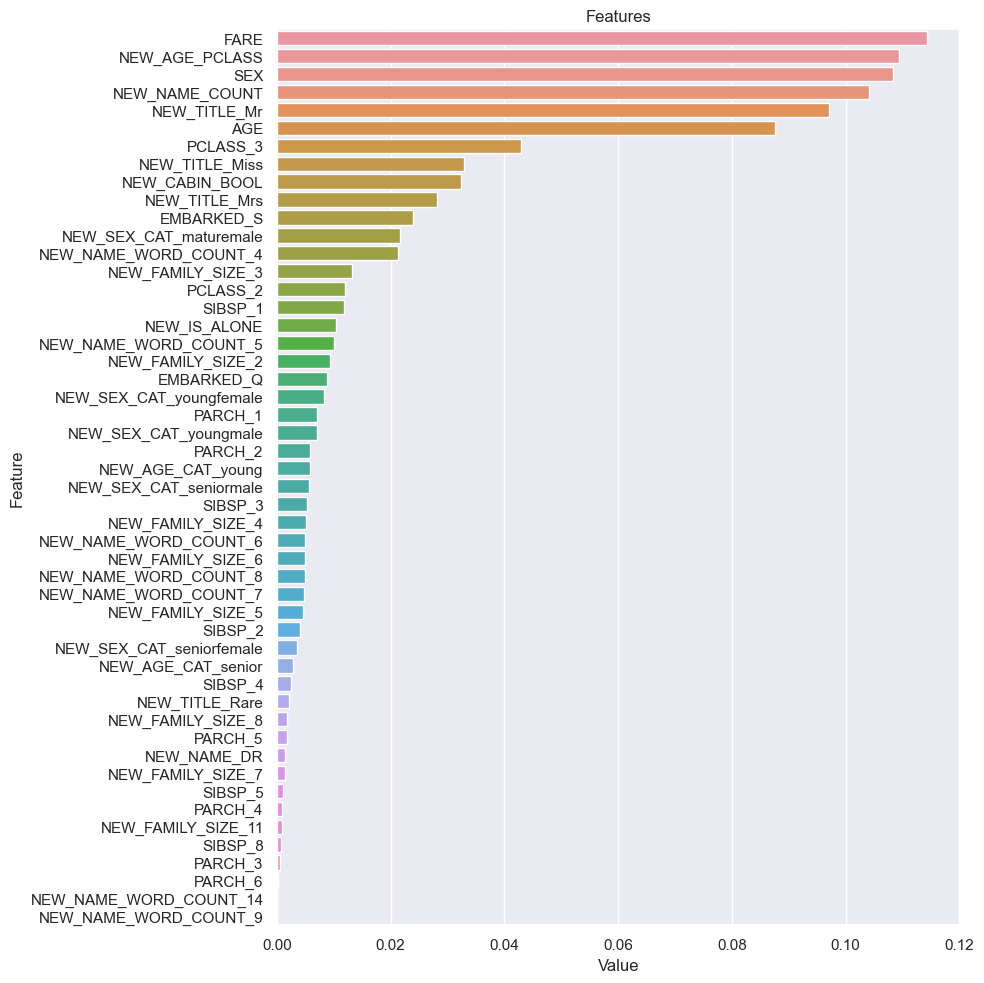

In [100]:
plot_importance(rf_model, X_train)

### Yukarıda hangi değişkenin ne kadar önemli olduğu görülmektedir. En tepelerde ise bizim feature engineering ile oluşturduğumuz değişkenlerin (veya oluşturduğumuz değişkenlerden birkaçının) olması yaptığımız işin değerini göstermektedir.